In [5]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import re

In [6]:
def pageDetail(detailurl):
    # 抓取內文頁面
    res = requests.get(detailurl)
    soup = BeautifulSoup(res.text, 'html.parser')

    #標題
    title   = soup.select('#h1')[0].text

    #摘要
    summary = soup.select('#summary')[0].text

    #時間
    time    = soup.select('.gggs time')[0].text
    dt      = datetime.strptime(time, '%Y年%m月%d日%H:%M')

    #人氣
    clicked      = 0
    clicked_text = soup.select('.clicked')[0].text
    m            = re.search('.+\((\d+)\)', clicked_text) 
    if m:
        clicked  = int(m.group(1))
    
    return {'title':title, 'summary':summary, 'dt':dt, 'clicked':clicked}

In [7]:
url = 'http://www.appledaily.com.tw/realtimenews/article/finance/20161012/966376/Note7%E6%B0%B8%E4%B9%85%E5%81%9C%E7%94%A2%E3%80%80%E4%B8%89%E6%98%9F%E6%97%A9%E7%9B%A4%E5%86%8D%E8%B7%8C3.3'
pageDetail(url)

{'clicked': 1548,
 'dt': datetime.datetime(2016, 10, 12, 9, 37),
 'summary': '三星昨宣布永久停產Note7，股價繼昨日收盤暴跌8.04%，今早盤一度續跌3.3%至149.40萬韓元，3個交易日累計下殺逾12%。昨美股3大指數全面收黑，跌幅均超過1%，其中道瓊工業指數跌逾200點或1.1%，收18128.66點。美國聯準會（Fed）可能升息、在美股財報季打頭陣的美鋁（ALCOA）發布的財報不如預期，以及三星陷入麻煩，均令投資人緊張。惟三星死對頭蘋果周二股價繼續逆勢昂揚，收漲0.22%至每股116.30美元，再創今年收盤新高，盤中最多勁揚2.3%。據《深圳商報》報導，蘋果執行長庫克在深圳會見地方官員時稱，將在深圳設立研發中心。庫克表示蘋果在深圳有10萬人致力於軟體開發，將繼續擴展在中國的研發投入。之前《財新》也報導，蘋果投資3億元人民幣，在北京中關村設立在中國首座研發中心。（于倩若／綜合外電報導）\xa0',
 'title': 'Note7永久停產\u3000三星早盤再跌3.3%'}

In [8]:
url = 'http://www.appledaily.com.tw/realtimenews/article/finance/20161012/966376/Note7%E6%B0%B8%E4%B9%85%E5%81%9C%E7%94%A2%E3%80%80%E4%B8%89%E6%98%9F%E6%97%A9%E7%9B%A4%E5%86%8D%E8%B7%8C3.3'
detail = pageDetail(url)
detail['title']

'Note7永久停產\u3000三星早盤再跌3.3%'

## 字典

In [9]:
#declare dictionary
dic={'a':100,'b':"yes",'c':0.98}
print(dic)

#get keys in dictionary
print(dic.keys())

#get values in dictionary
print(dic.values())


{'b': 'yes', 'c': 0.98, 'a': 100}
dict_keys(['b', 'c', 'a'])
dict_values(['yes', 0.98, 100])


In [10]:
#get value of given key
print(dic['a'])

#get value of given key
print(dic.get('a'))

100
100


In [11]:
#get value of given key
print(dic['d'])

KeyError: 'd'

In [ ]:
#get value of given key
print(dic.get('d'))

print(dic.get('d', 'qoo'))

In [ ]:
#add entry into dictionary
dic['d']='new'
print(dic)

In [ ]:
#add entry into dictionary
dic.update({'d':999,'e':123, 'f':456})
print(dic)

In [ ]:
# iter the dictionary
for key in dic:
    print(key,dic[key])

## 取得頁面連結片段

In [ ]:
domain = 'http://www.appledaily.com.tw'
res  = requests.get('http://www.appledaily.com.tw/realtimenews/section/new/')
soup = BeautifulSoup(res.text, 'html.parser')
for rtddt in soup.select('li.rtddt'):
    if domain not in rtddt.select('a')[0]['href']:
        print(domain + rtddt.select('a')[0]['href'])
    else:
        print(rtddt.select('a')[0]['href']) 

## 產生分頁片段

In [ ]:
newsurl = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'
# for(int i = 1; i < 10 ; i++)
for i in range(1,10): 
    print(newsurl.format(i))

## 取得多頁蘋果新聞

In [13]:
domain  = 'http://www.appledaily.com.tw'
newsurl = 'http://www.appledaily.com.tw/realtimenews/section/new/{}'

newsary = []

# 產生分頁連結
for page in range(1,3): 
    print(page)
    
    #取得分頁HTML
    section = requests.get(newsurl.format(page))
    soup    = BeautifulSoup(section.text, 'html.parser')

    #取得每分頁中的內文連結
    for rtddt in soup.select('li.rtddt'):
        try:
            # 使用字典整理資料
            dic  = {}

            #取得類別
            category = rtddt.select('h2')[0].text

            # 取得聯結
            link     = rtddt.select('a')[0]['href']
            #檢視連結中有沒有包含domain
            if domain not in link:
                link = domain + link

            #增添link 與category
            dic['link'] = link
            dic['category'] = category

            # 呼叫pageDetail 函式更新內文內容
            dic.update(pageDetail(dic['link']))

            #將字典加入list 之中
            newsary.append(dic)
        except:
            pass
            

1
2


## 將資料整理成DataFrame

In [25]:
import pandas
newsdf = pandas.DataFrame(newsary)
newsdf.head()

,category,clicked,dt,link,summary,title
0,社會,0,2016-10-12 11:39:00,http://www.appledaily.com.tw/realtimenews/arti...,法網難逃！新北市八里區一名毒品通緝犯，上週六騎在外閒晃，見巡邏警本欲逃跑，卻遭警追前攔下盤查...,遇警盤查催油落跑 騎士見義勇為撞阻逮犯
1,國際,0,2016-10-12 11:39:00,http://www.appledaily.com.tw/realtimenews/arti...,共和黨總統候選人川普11年前的低級言論在全美發酵，掀起一陣輿論撻伐，連同黨黨內大老萊恩都表明...,又秀下限？川普新廣告攻擊希拉蕊健康惹議
2,體育,0,2016-10-12 11:38:00,http://www.appledaily.com.tw/realtimenews/arti...,76人3年級射手史陶斯卡斯( Nik Stauskas)，今年9月起再度尋求運動心理師的幫助...,76人史陶斯卡斯看心理師 強化外界負評忍受力
3,體育,0,2016-10-12 11:36:00,http://www.appledaily.com.tw/realtimenews/arti...,為什麼選擇「洗腳」表達孝親？全國體育總會會長張朝國說：「當初是因緣際會，有位修道的大師向我提...,洗腳體會長輩艱辛路 國外也有類似儀式
4,社會,137,2016-10-12 11:35:00,http://www.appledaily.com.tw/realtimenews/arti...,新政府上台後，行政院將轟動一時的太陽花學運及323佔領行政院被起訴的126人撤告，國民黨籍立...,林全撤告太陽花學運 遭陳學聖控圖利


## 取得敘述性統計

In [26]:
newsdf.describe()

,clicked
count,60.000000
mean,15198.350000
std,57761.364689
min,0.000000
25%,282.000000
50%,771.500000
75%,1946.000000
max,384651.000000


In [27]:
# select title, clicked from newsdf order by clicked desc limit 5
newsdf.sort_values('clicked', ascending=False)[['title', 'clicked']].head()

,title,clicked
56,【荒唐片】景文迎新比酒店還狂 校方將送性平會,384651
30,【狗仔偷拍片】黑人風神開林寶堅尼 卻做了這事馬上道歉,163242
29,【狗仔偷拍片】黑人風神開林寶堅尼 卻做了這事馬上道歉,163242
38,【怒吃片】好市多這一腿好驚人 半年狂賣500萬支,70378
24,陳彥伯偷吃骨感妹後 元配公開這樣做,65661


In [28]:
# select category, max(clicked) from newsdf group by category
newsdf.groupby('category')['clicked'].max()

category
副刊     70378
國際      3388
地產      1187
娛樂    163242
政治      4858
時尚       107
生活     65661
社會    384651
財經      7985
體育       800
Name: clicked, dtype: int64

In [29]:
# 根據每個類別產生該類別最人氣點擊數
idx = newsdf.groupby(['category'])['clicked'].transform(max)==newsdf['clicked']
newsdf[idx][['category', 'clicked', 'title']]

,category,clicked,title
5,時尚,107,懷胎6月能愛美嗎？ 勇樣老婆示範YSL彩妝
16,財經,7985,【看片已羨慕】升官還給1個月假 這家公司員工好幸福
24,生活,65661,陳彥伯偷吃骨感妹後 元配公開這樣做
29,娛樂,163242,【狗仔偷拍片】黑人風神開林寶堅尼 卻做了這事馬上道歉
30,娛樂,163242,【狗仔偷拍片】黑人風神開林寶堅尼 卻做了這事馬上道歉
38,副刊,70378,【怒吃片】好市多這一腿好驚人 半年狂賣500萬支
42,體育,800,阿公炸裂 羅斯成為最老季後賽開轟捕手
47,政治,4858,【國共論壇】​洪秀柱11月赴北京 國民黨：洪習會規劃中
51,地產,1187,破盤價不夠看 首購案再出招
56,社會,384651,【荒唐片】景文迎新比酒店還狂 校方將送性平會


In [30]:
# select category, sum(clicked) from newsdf order by sum(clicked) desc
newsdf.groupby(['category'])['clicked'].sum().sort_values(ascending=False)

category
社會    402848
娛樂    330736
生活     75947
副刊     70378
財經     14200
國際      6842
政治      6637
體育      2748
地產      1458
時尚       107
Name: clicked, dtype: int64

In [31]:
# select category, avg(clicked) from newsdf order by sum(clicked) desc
newsdf.groupby(['category'])['clicked'].mean().sort_values(ascending=False)

category
娛樂    82684.000000
副刊    70378.000000
社會    28774.857143
生活     5424.785714
財經     2366.666667
政治     1327.400000
國際     1140.333333
地產      729.000000
體育      392.571429
時尚      107.000000
Name: clicked, dtype: float64

## 使用Pandas 繪圖

Populating the interactive namespace from numpy and matplotlib


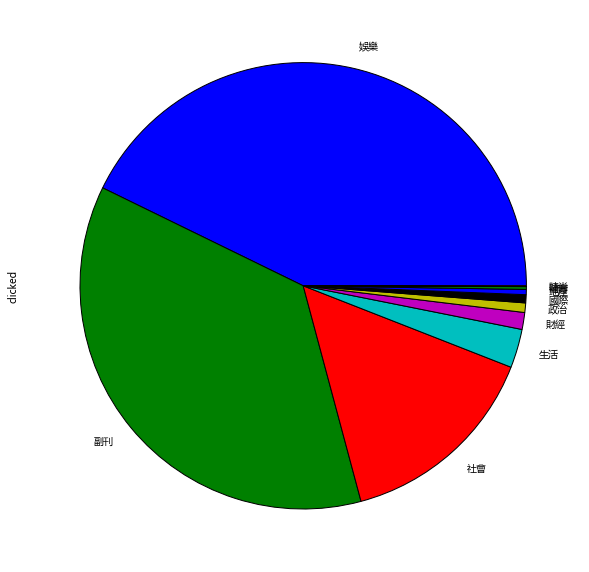

In [33]:
%pylab inline
sorteddf = newsdf.groupby(['category'])['clicked'].mean().sort_values(ascending=False)
sorteddf.plot(kind='pie', figsize=[10,10])

## 如何讓matplotlib 顯示中文

1. 先到 C:\Anaconda3\Lib\site-packages\matplotlib\mpl-data
2. 修改 matplotlibrc
3. font.family 前面的 # 拿掉
4. font.sans-serif 前面加上 Microsoft YaHei,
5. 要重啟 Jupyter notebook

## 寫入Excel

In [35]:
newsdf.to_excel('news.xlsx')

## 從Excel 讀入資料

In [36]:
import pandas
df2 = pandas.read_excel('news.xlsx')
df2.head()

,category,clicked,dt,link,summary,title
0,社會,0,2016-10-12 11:39:00,http://www.appledaily.com.tw/realtimenews/arti...,法網難逃！新北市八里區一名毒品通緝犯，上週六騎在外閒晃，見巡邏警本欲逃跑，卻遭警追前攔下盤查...,遇警盤查催油落跑 騎士見義勇為撞阻逮犯
1,國際,0,2016-10-12 11:39:00,http://www.appledaily.com.tw/realtimenews/arti...,共和黨總統候選人川普11年前的低級言論在全美發酵，掀起一陣輿論撻伐，連同黨黨內大老萊恩都表明...,又秀下限？川普新廣告攻擊希拉蕊健康惹議
2,體育,0,2016-10-12 11:38:00,http://www.appledaily.com.tw/realtimenews/arti...,76人3年級射手史陶斯卡斯( Nik Stauskas)，今年9月起再度尋求運動心理師的幫助...,76人史陶斯卡斯看心理師 強化外界負評忍受力
3,體育,0,2016-10-12 11:36:00,http://www.appledaily.com.tw/realtimenews/arti...,為什麼選擇「洗腳」表達孝親？全國體育總會會長張朝國說：「當初是因緣際會，有位修道的大師向我提...,洗腳體會長輩艱辛路 國外也有類似儀式
4,社會,137,2016-10-12 11:35:00,http://www.appledaily.com.tw/realtimenews/arti...,新政府上台後，行政院將轟動一時的太陽花學運及323佔領行政院被起訴的126人撤告，國民黨籍立...,林全撤告太陽花學運 遭陳學聖控圖利


In [ ]:
import pandas.io.data as web
tw2330 = web.DataReader('2330.TW',  data_source='yahoo')
tw2330.tail()

## 使用python 連結SQLite

In [39]:
import sqlite3 as lite

# 連線到資料庫
con = lite.connect('test.sqlite')

# 建立游標操作資料庫
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')

# 透由游標取得資料
data = cur.fetchone()
print(data)

# 關閉資料庫連線
con.close()

('3.8.11',)


In [40]:
import sqlite3 as lite

# 連線到資料庫，操作完以後，自動關閉
with lite.connect('test.sqlite') as con:

    # 建立游標操作資料庫
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')

    # 透由游標取得資料
    data = cur.fetchone()
    print(data)


('3.8.11',)


## 完整SQLITE 操作

In [43]:
# 連線到資料庫，操作完以後，自動關閉
with lite.connect('test.sqlite') as con:

    # 建立游標操作資料庫
    cur = con.cursor()
    
    # 捨棄已存在表格
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    
    # 使用create 建立表格
    cur.execute("""CREATE TABLE PhoneAddress(
                    phone   CHAR(10) PRIMARY KEY, 
                    address TEXT, 
                    name    TEXT unique,
                    age     INT NOT NULL
                    )""")
    
    # 使用insert 語句新增資料
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','JhonDoe',53)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan' ,'MuMuCat',6 )")
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei'      ,'Richard',29)")
    
    # 使用SELECT 取得資料
    cur.execute("SELECT phone,address FROM PhoneAddress")
    
    # 使用fetchall 取得 SElECT 後的所有資料
    data = cur.fetchall()
    for rec in data:
        print(rec)



('0912173381', 'United State')
('0928375018', 'Tokyo Japan')
('0957209108', 'Taipei')


In [46]:
# 連線到資料庫，操作完以後，自動關閉
with lite.connect('test.sqlite') as con:

    # 建立游標操作資料庫
    cur = con.cursor()
    
    # 使用SELECT 取得資料
    cur.execute("SELECT phone,address FROM PhoneAddress")
    
    # 使用fetchall 取得 SElECT 後的第一筆資料
    data = cur.fetchone()
    print(data)

    print('=================================')
    
    # 使用fetchall 取得 SElECT 後的所有資料
    data = cur.fetchall()
    for rec in data:
        print(rec)

('0912173381', 'United State')
('0928375018', 'Tokyo Japan')
('0957209108', 'Taipei')


## 將新聞資料儲存至資料庫 (比較複雜的方法)

### 建立news 資料庫與資料表

In [77]:
# 連線到資料庫，操作完以後，自動關閉
with lite.connect('news.sqlite') as con:

    # 建立游標操作資料庫
    cur = con.cursor()
    
    # 捨棄已存在表格
    cur.execute("DROP TABLE IF EXISTS news")
    
    # 使用create 建立表格
    cur.execute("""CREATE TABLE news(
                    link     CHAR(1000),      
                    title    CHAR(100), 
                    summary  TEXT, 
                    category CHAR(100), 
                    dt       DATETIME,
                    clicked  INT 
                    )""")

### 建立SQL Statement , 將資料插入到資料表中

In [78]:
# sample sql
# INSERT INTO news(category,summary,clicked,title,link,dt) 
#    VALUES(?,?,?,?,?,?)
insert_sql = 'INSERT INTO news({}) VALUES({})'

# 連線到資料庫，操作完以後，自動關閉
with lite.connect('news.sqlite') as con:

    # 建立游標操作資料庫
    cur = con.cursor()
    
    for news in newsary:
        columns      = ','.join(news.keys())
        placeholders = ','.join('?' * len(news.keys()))
        sql_stmt     = insert_sql.format(columns, placeholders)
        cur.execute(sql_stmt, list(news.values()))

### 使用Select 語句查詢資料庫內的內容

In [79]:
# 連線到資料庫，操作完以後，自動關閉
with lite.connect('news.sqlite') as con:
    # 建立游標操作資料庫
    cur = con.cursor()
    cur.execute('SELECT * FROM news')
    data = cur.fetchone()
    print(data)

('http://www.appledaily.com.tw/realtimenews/article/local/20161012/966448/遇警盤查催油落跑\u3000騎士見義勇為撞阻逮犯', '遇警盤查催油落跑\u3000騎士見義勇為撞阻逮犯', '法網難逃！新北市八里區一名毒品通緝犯，上週六騎在外閒晃，見巡邏警本欲逃跑，卻遭警追前攔下盤查。未料，警正要以小電腦盤查身分，男子卻丟了一句「駕照在我家裡」隨即坐上機車催門逃逸。警從後追捕近百公尺，所幸路上騎士見義勇為，衝前將嫌撞倒順利逮捕。警方調查，毒品通緝犯張男(50歲)，因毒品案未入監服刑，遭新竹法院發布通緝，便北上四處打零工維生，逃避警方追緝。上週六下午近5時許，張男騎車在八里區路上閒逛，行經中山路二段時，正巧碰上蘆洲警分局八里分駐所警員侯劍鵬巡經此路，張男卻刻意放慢車速在後，這讓侯員覺得奇怪，對張男招手示意停車攔查。警方說，盤查過程警問：「駕照證件看一下」但黃男神色卻顯緊張吞吐回應：「我身上沒帶任何證件，必須回家拿身分證」話才說完，黃男突坐上機車，加速催油往前逃奔，侯員見狀從後鳴笛緊追，雙方追逐近百公尺遠，侯員趁機從後一把將黃男拉下，黃男瞬間倒地爬起，拼命掙扎並與警在路口扭打，過程中不斷叫著「就跟你說要回家拿嗎」。此時，一名路過騎士經過，用機車撞倒黃男，一旁路人看見也協助幫警，順利逮捕黃男到案。（突發中心曾伯愷／新北報導）\xa0', '社會', '2016-10-12 11:39:00', 0)


## 合併 List 成字串的方法

In [51]:
a = ['a', 'b', 'c', 'd', 'e']
','.join(a)

'a,b,c,d,e'

In [55]:
','.join('?' * 6)

'?,?,?,?,?,?'